# ResNet 응용

In [9]:
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions

In [10]:
resnet50 = ResNet50()
resnet50.summary()

102981632/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

In [11]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from google.colab import files
up = files.upload()

Saving 개.jpg to 개.jpg


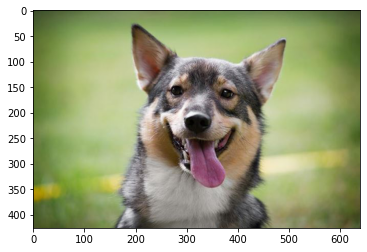

In [12]:
img = Image.open('개.jpg')
plt.imshow(img);

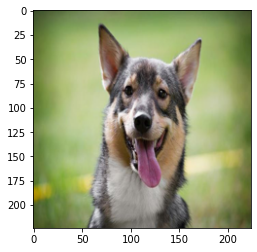

In [13]:
img = img.resize((224,224))
plt.imshow(img);

- 이미지 예측

In [14]:
yhat = resnet50.predict(np.array(img).reshape(1,224,224,3))
label = decode_predictions(yhat)
yhat.shape, label

((1, 1000),
 [[('n02106662', 'German_shepherd', 0.5815815),
   ('n02109961', 'Eskimo_dog', 0.10439131),
   ('n02110185', 'Siberian_husky', 0.07343957),
   ('n02114367', 'timber_wolf', 0.04653058),
   ('n02105412', 'kelpie', 0.031236857)]])

- 이미지를 중앙으로 위치하여 자르기

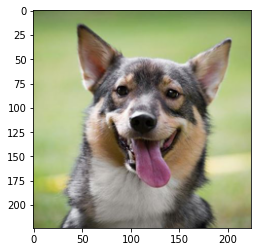

In [15]:
from image_util import center_image
img = Image.open('개.jpg')
img = center_image(img, src_format='Pillow', dst_format='Pillow')
plt.imshow(img);

In [16]:
yhat = resnet50.predict(np.array(img).reshape(1,224,224,3))
label = decode_predictions(yhat)
label

[[('n02091467', 'Norwegian_elkhound', 0.89188296),
  ('n02109961', 'Eskimo_dog', 0.037962016),
  ('n02105412', 'kelpie', 0.018874753),
  ('n02106662', 'German_shepherd', 0.010656763),
  ('n02110185', 'Siberian_husky', 0.009464736)]]